# Netflix -Team 1


### Introduction
Given the Netflix titles dataset with the following column titles:

* show_id
* type
* title
* director
* cast
* country
* date_added
* release_year
* rating
* duration
* listed_in
* description

### We aim to obtain the following information/relationships from our dataset:

#### Country-based analysis
We will analyze the distribution of content by country of production to understand Netflix's international content selection. This can be done by counting the number of titles in each country and plotting the results. We can also look at the average rating and duration of titles in each country.
#### Genre analysis
We will analyze the distribution of content by genre using the listed_in column to identify the most popular genres on Netflix. This can be done by counting the number of titles in each genre and plotting the results. We can also look at the average rating and duration of titles in each genre.
#### Director insights
We will explore the works of different directors, finding out which directors have the most content on Netflix, or analyzing the popularity of content by specific directors. This can be done by counting the number of titles directed by each director and plotting the results. We can also look at the average rating and duration of titles directed by each director

In [2]:
import numpy as np
import pandas as pd

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


### Importing data set for data wrangling

In [1]:
import pandas as pd

netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv(netflix_titles)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Country-based analysis
Here we will analyze the distribution of content by country of production to understand Netflix's international content selection.

Analyses here shows that over between the years 2013 - 2021,  Unites states, India, UK have the most content added on Netflix 

In [30]:
import pandas as pd
netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv(netflix_titles)

def get_top_countries(df):
    """
    This function takes a DataFrame (df) and returns the top 20 countries with the most number of TV shows and movies.

  Args:
    df: The DataFrame containing the Netflix titles raw data.

  Returns:
    The fuction returns the top 20 countries with the most number of TV shows and movies.
    """
    df['country'] = df['country'].str.split(', ') # Splitting the country column into a list of countries.
    df = df.explode('country')
    count_per_country = df.groupby('country')['show_id'].nunique() #grouping the list by unique values (countries)
    count_per_country = count_per_country.sort_values(ascending= False) #sorting the countries based on the number of shows/movies
    top_countries = count_per_country.head(10)
    return(top_countries)
top_countries = get_top_countries(df)

In [37]:
print("Countries with most shows added:")
print(top_countries)

Countries with most shows added:
country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: show_id, dtype: int64


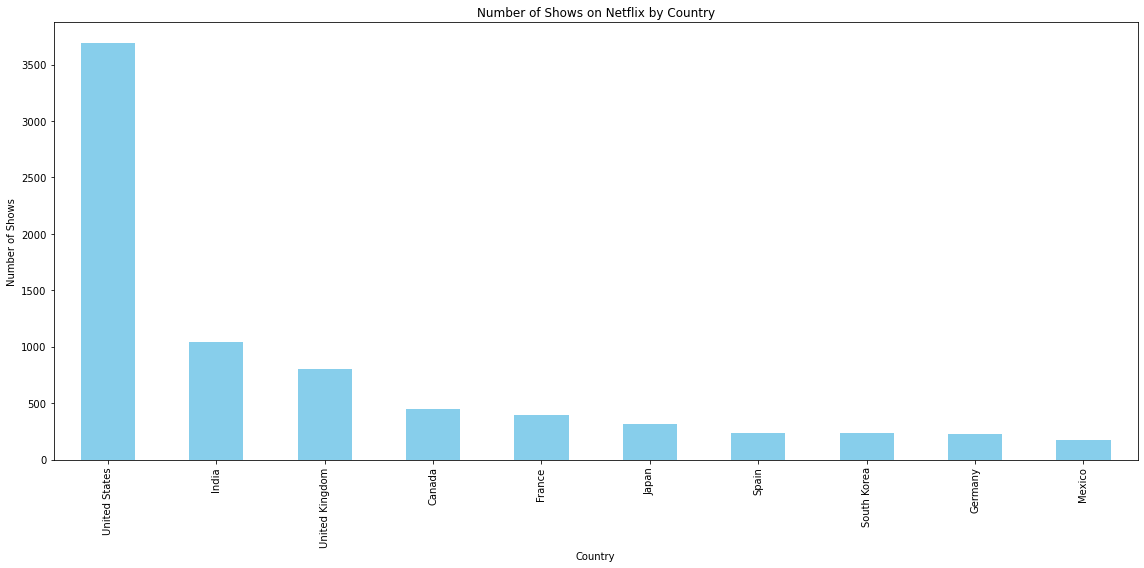

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))  # Adjust the figure size as needed
top_countries.plot(kind='bar', color='skyblue')
plt.title('Number of Shows on Netflix by Country')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Display the graph
plt.show()

### Genre analysis
Here we will analyse the unique genres found in the USA and the number of shows categories within each genre
The results show that the Neftlix USA content is mostly composed of Documentaries, comedies and drama.

In [34]:
import pandas as pd
netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv(netflix_titles)
def usa_genre(df):
    """
    This functions takes a dataframe and returns the unique genres within the USA
    
    Args:
    df:a DataFrame containing the Netflix titles raw data. 
    
    Returns:
    This function returns the uniques genres in USA and numbers of shows/movies within each genre
    """
    usa_data = df[df['country'] == 'United States']  # Filter for movies/shows in the USA
    genres = usa_data['listed_in'].str.split(', ').explode()  # split and creates new row for each genre in the list
    show_ids = usa_data['show_id']  # Get the show_ids for each genre
    genre_counts = pd.DataFrame({'show_id': show_ids, 'genre': genres})  # Create a DataFrame with show_id and genre
    genre_counts = genre_counts.groupby('genre')['show_id'].count().sort_values(ascending= False).reset_index()  # Count the number of shows for each genre
    
    return genre_counts
   
genre_counts = usa_genre(df) 

In [36]:
print("Number of shows/movie per genre in the USA:")
print(genre_counts)

Number of shows/movie per genre in the USA:
                           genre  show_id
0                         Dramas      591
1                       Comedies      524
2                  Documentaries      411
3             Independent Movies      302
4       Children & Family Movies      272
5             Action & Adventure      249
6                    TV Comedies      234
7                Stand-Up Comedy      215
8                      Thrillers      193
9                      TV Dramas      189
10                    Docuseries      173
11               Romantic Movies      173
12                      Kids' TV      146
13                 Horror Movies      143
14              Music & Musicals      119
15                    Reality TV      114
16                Crime TV Shows      111
17              Sci-Fi & Fantasy      107
18                 Sports Movies       91
19         TV Action & Adventure       70
20                Classic Movies       61
21                  LGBTQ Movies

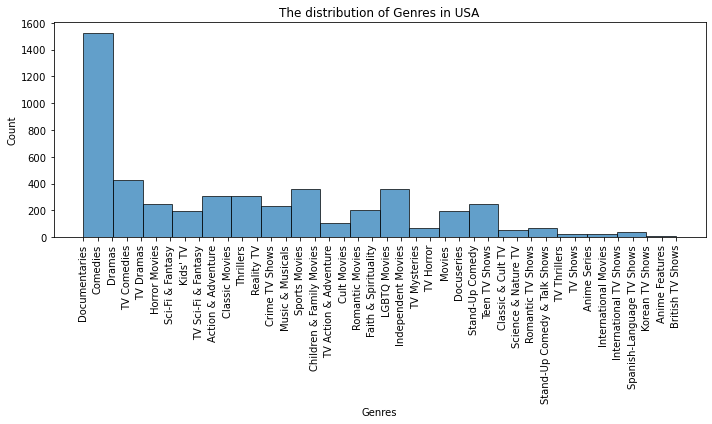

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_titles = "/Users/ngokoana/Downloads/netflix_titles.csv"
df = pd.read_csv("netflix_titles.csv")

def usa_genre(df):
    usa_data = df[df['country'] == 'United States'] 
    genres = usa_data['listed_in'].str.split(', ').explode()  
    genre_counts = genres.value_counts().sort_index(ascending=True)
    
    # Creating a histogram for genre distribution
    plt.figure(figsize=(10, 6))
    plt.hist(genres, bins=20, edgecolor='black', alpha=0.7)
    plt.title('The distribution of Genres in USA')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()
usa_genre(df)


### Director insights
We will explore the works of different directors, finding out which USA directors have the most content on Netflix.
The results show that directors Marcus Raboy, Jay Karas and  Jay Chapma have directed the most shows.


In [21]:
import pandas as pd
netflix_df = pd.read_csv("netflix_titles.csv")

def get_directors (df):
    """
    This function take a dataframe and return the directors
    
    Args:
    df: a dataframe containing netflix titles data
    
    Returns: 
    This function return the Top reoccruing directors from shows/movies from the USA)
    
    """
    usa_shows = netflix_df[netflix_df['country'] == 'United States'] # filter focusing on the USA
    usa_directors = usa_shows['director'].str.split(', ').explode() # Getting directors, accomodating the possibility if > 1 director in a cell by split(', ') and explode
    director_counts = usa_directors.value_counts() #counting the direction in the USA
    top_directors = director_counts.head(10)
    return top_directors
top_directors = get_directors(df)

In [39]:
print("Top Directors in Shows & Movies from the United States:")
print(top_directors)

Top Directors in Shows & Movies from the United States:
Marcus Raboy       15
Jay Karas          15
Jay Chapman        12
Shannon Hartman     9
Martin Scorsese     8
Troy Miller         8
Ryan Polito         8
Lance Bangs         7
Leslie Small        7
Michael Simon       6
Name: director, dtype: int64


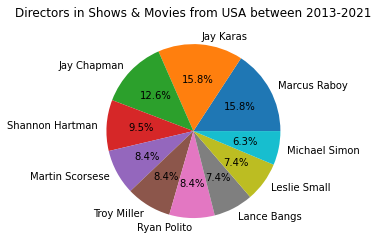

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df = pd.read_csv("netflix_titles.csv")
usa_shows = netflix_df[netflix_df['country'] == 'United States'] 
usa_directors = usa_shows['director'].str.split(', ').explode() 
director_counts = usa_directors.value_counts() 
top_directors = director_counts.head(10) 

#Creating the pie chart
plt.pie(top_directors.values, labels=top_directors.index, autopct="%1.1f%%")
plt.title("Directors in Shows & Movies from USA between 2013-2021")
plt.show()